# Using Holt Winter's Method

# Predicting Total Deceased by 31st JULY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt

In [4]:
data = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','Total Deceased'])
data = data[(data != 0).all(1)]

In [5]:
data.head()

,Total Deceased
Date,
12-03-2020,1
13-03-2020,1
14-03-2020,2
15-03-2020,2
16-03-2020,2


In [6]:
data.tail()

,Total Deceased
Date,
01-06-2021,334525
02-06-2021,337423
03-06-2021,340140
04-06-2021,343512
05-06-2021,346194


In [7]:
data.iplot(xTitle='Date',yTitle='Total Deceased')

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
C:\Users\conne\Anaconda3\lib\sit

Daily Predictions of Deaths From 6th June to 31st July
451    349319.941063
452    352281.661875
453    355321.139164
454    358440.907389
455    361567.763308
           ...      
507    548743.959328
508    552775.983774
509    556762.678389
510    560946.968534
511    565067.137197
Length: 61, dtype: float64


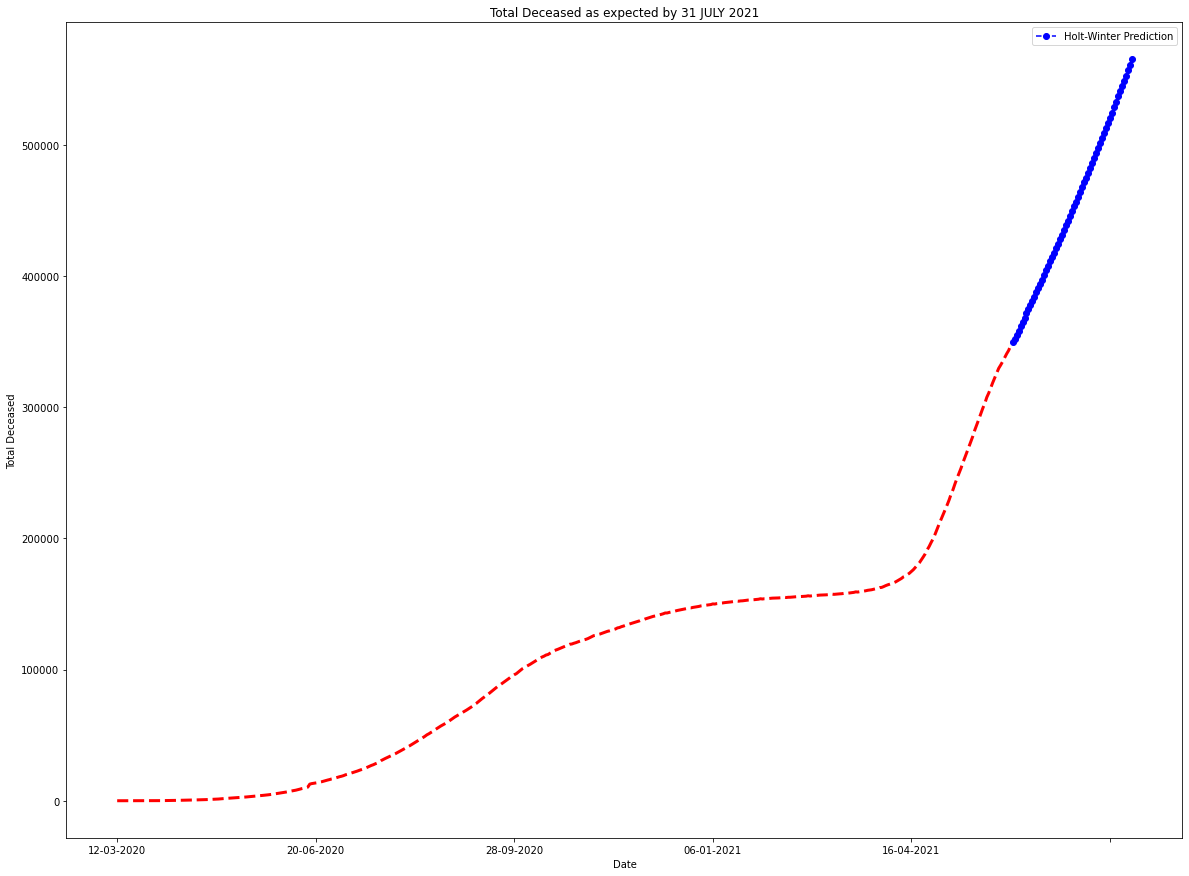

Forecasting deaths due to Covid19 using Holt-Winters method with additive seasonality.


In [9]:
fit1 = ExponentialSmoothing(data, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red',linewidth=3)

fcast1 = fit1.forecast(61).rename("Holt-Winter Prediction")
fcast1.plot(style='--', marker='o', color='blue', legend=True)

print('Daily Predictions of Deaths From 6th June to 31st July')
print(fit1.forecast(61))
plt.xlabel('Date')
plt.ylabel('Total Deceased')
plt.title('Total Deceased as expected by 31 JULY 2021')
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("Forecasting deaths due to Covid19 using Holt-Winters method with additive seasonality.")

# Predicting Total Confirmed by 31st JULY

In [9]:
data1 = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','Total Confirmed'])
data1 = data1[(data1 != 0).all(1)]

In [10]:
data1.head()

,Total Confirmed
Date,
30-01-2020,1
31-01-2020,1
01-02-2020,1
02-02-2020,2
03-02-2020,3


In [11]:
data1.tail()

,Total Confirmed
Date,
01-06-2021,28306818
02-06-2021,28440862
03-06-2021,28573286
04-06-2021,28693740
05-06-2021,28808226


In [12]:
data1.iplot(xTitle='Date',yTitle='Total Confirmed')


C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
C:\Users\conne\Anaconda3\lib\sit

Daily Prediction of Total Confirmed Cases From 6th June to 31st July
493    2.893506e+07
494    2.904455e+07
495    2.916479e+07
496    2.931245e+07
497    2.944168e+07
           ...     
549    3.676716e+07
550    3.689872e+07
551    3.704317e+07
552    3.722054e+07
553    3.737574e+07
Length: 61, dtype: float64


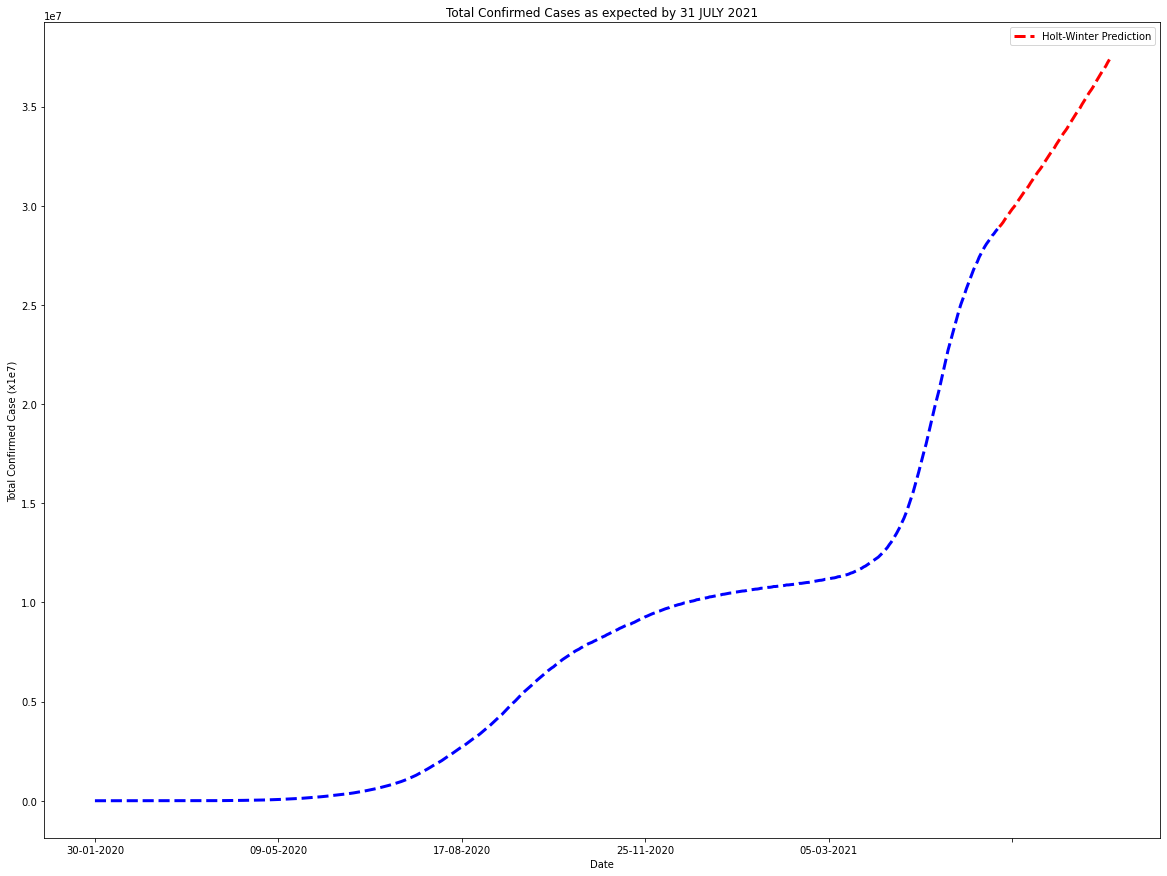

Forecasting Total Confirmed Cases of Covid19 using Holt-Winters method with additive seasonality.


In [13]:
fit1 = ExponentialSmoothing(data1, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='blue',linewidth=3)

fcast1 = fit1.forecast(61).rename("Holt-Winter Prediction")
fcast1.plot(style='--', color='red', legend=True,linewidth=3)

print('Daily Prediction of Total Confirmed Cases From 6th June to 31st July')
print(fit1.forecast(61))
plt.xlabel('Date')
plt.ylabel('Total Confirmed Case (x1e7)')
plt.title('Total Confirmed Cases as expected by 31 JULY 2021')
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("Forecasting Total Confirmed Cases of Covid19 using Holt-Winters method with additive seasonality.")

# Predicting Recovery Rate

In [13]:
data2 = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','Recovery Rate'])
data2 = data2[(data2 != 0).all(1)]

In [14]:
data2.head()

,Recovery Rate
Date,
13-02-2020,33.33
14-02-2020,33.33
15-02-2020,33.33
16-02-2020,66.67
17-02-2020,66.67


In [15]:
data2.tail()

,Recovery Rate
Date,
01-06-2021,92.45
02-06-2021,92.76
03-06-2021,93.06
04-06-2021,93.36
05-06-2021,93.64


In [16]:
data2.iplot(xTitle='Date',yTitle='Recovery Rate')

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
C:\Users\conne\Anaconda3\lib\sit

Recovery Rate From 6th June to 31st July
479     94.023935
480     94.526846
481     94.891547
482     95.170054
483     95.457710
          ...    
535    112.779580
536    113.222790
537    113.544469
538    113.790275
539    114.044293
Length: 61, dtype: float64


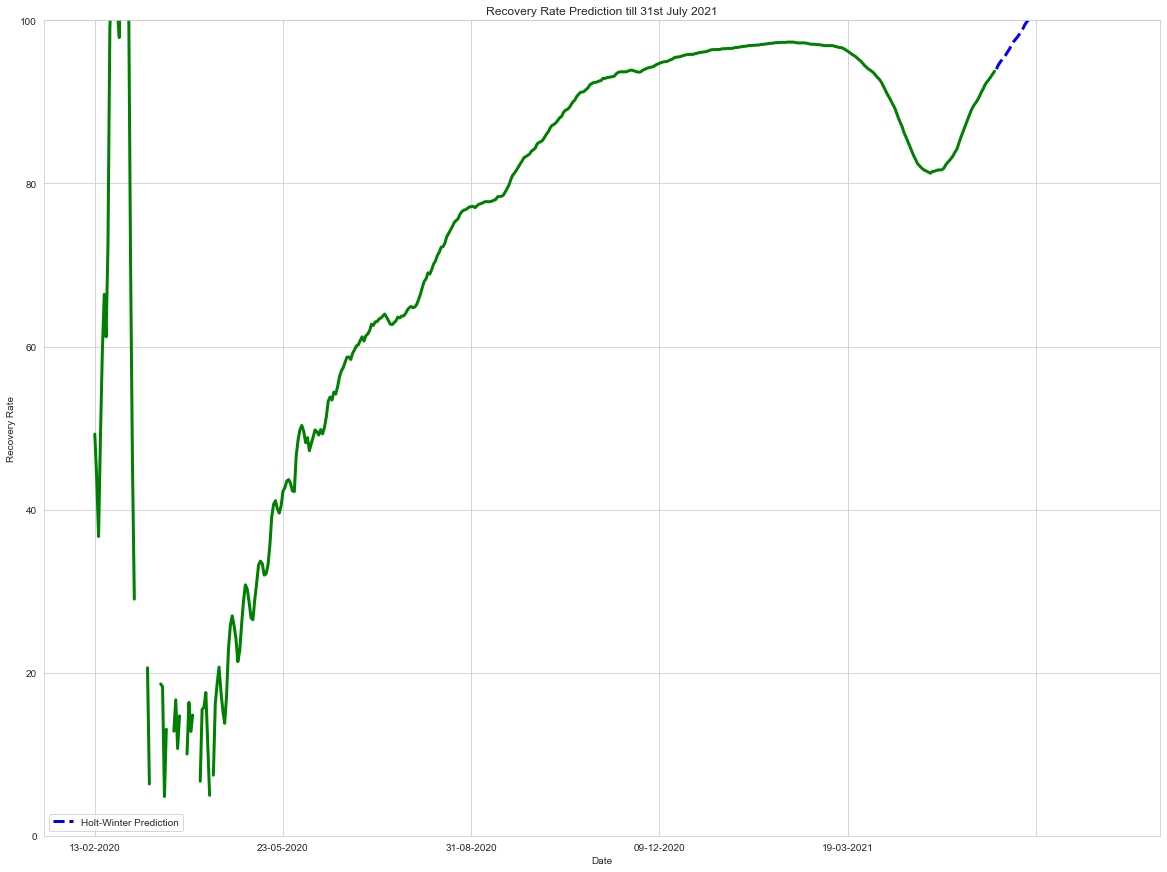

Forecasting Recovery Rate of Covid19 using Holt-Winters method with additive seasonality.


In [66]:
fit1 = ExponentialSmoothing(data2, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(color='green',linewidth=3)

fcast1 = fit1.forecast(61).rename("Holt-Winter Prediction")
fcast1.plot(style='--', color='blue', legend=True,linewidth=3)

print('Recovery Rate From 6th June to 31st July')
print(fit1.forecast(61))
plt.xlabel('Date')
plt.ylabel('Recovery Rate')
plt.title('Recovery Rate Prediction till 31st July 2021')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.ylim(0,100)
plt.show()
print("Forecasting Recovery Rate of Covid19 using Holt-Winters method with additive seasonality.")

# Death Rate Prediction

In [17]:
data3 = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','Death Rate'])
data3 = data3[(data3 != 0).all(1)]

In [18]:
data3.head()

,Death Rate
Date,
12-03-2020,1.23
13-03-2020,1.10
14-03-2020,1.96
15-03-2020,1.79
16-03-2020,1.59


In [19]:
data3.tail()

,Death Rate
Date,
01-06-2021,1.18
02-06-2021,1.19
03-06-2021,1.19
04-06-2021,1.20
05-06-2021,1.20


In [20]:
data3.iplot(xTitle='Date',yTitle='Death Rate')

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
C:\Users\conne\Anaconda3\lib\sit

Death Rate From 6th June to 31st July
451    1.206552
452    1.210145
453    1.216229
454    1.215648
455    1.222072
         ...   
507    1.455440
508    1.460897
509    1.470160
510    1.469274
511    1.479079
Length: 61, dtype: float64


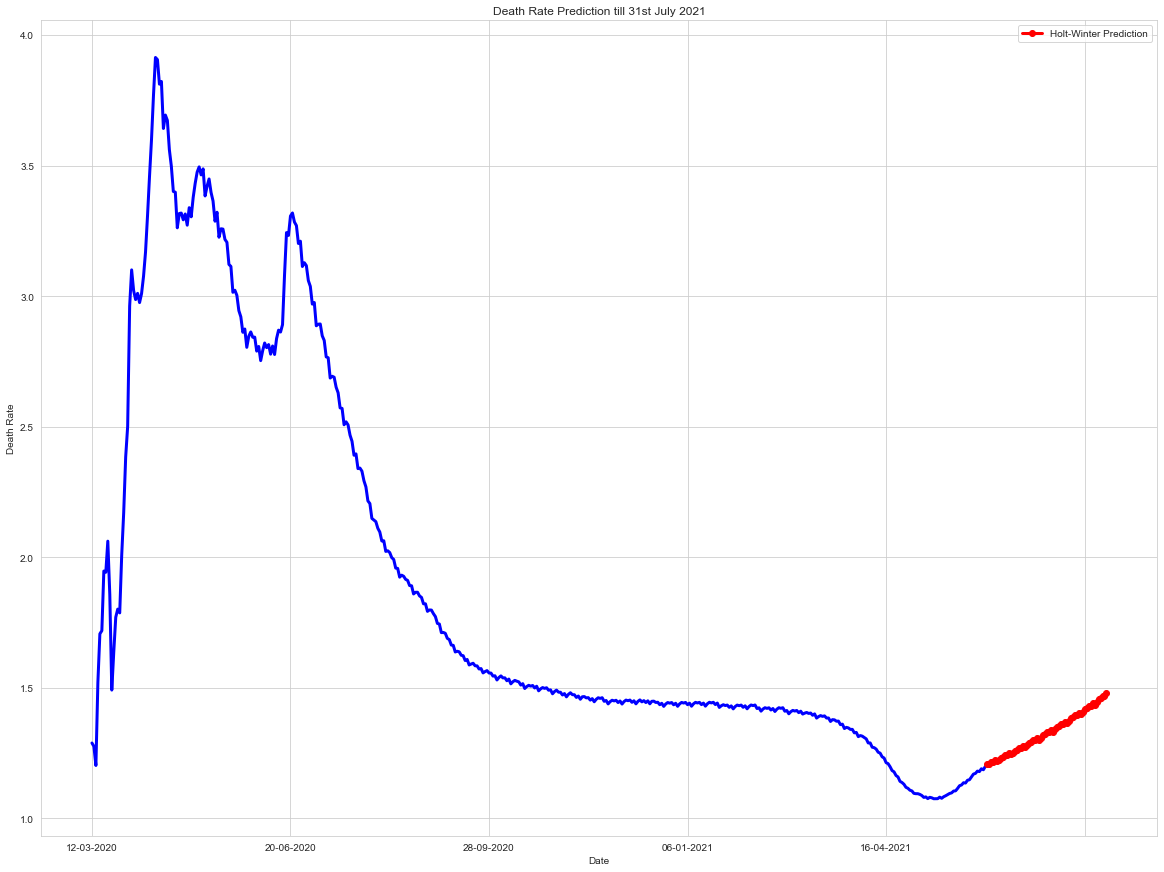

Forecasting Death Rate of Covid19 using Holt-Winters method with additive seasonality.


In [65]:
fit1 = ExponentialSmoothing(data3, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(color='blue',linewidth=3)

fcast1 = fit1.forecast(61).rename("Holt-Winter Prediction")
fcast1.plot( color='red',marker='o', legend=True,linewidth=3)

print('Death Rate From 6th June to 31st July')
print(fit1.forecast(61))
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.title('Death Rate Prediction till 31st July 2021')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
#plt.ylim(0,100)
plt.show()
print("Forecasting Death Rate of Covid19 using Holt-Winters method with additive seasonality.")

# Active Cases

In [21]:
data4 = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','Active Cases'])
data4 = data4[(data4 != 0).all(1)]

In [22]:
data4.head()

,Active Cases
Date,
30-01-2020,1
31-01-2020,1
01-02-2020,1
02-02-2020,2
03-02-2020,3


In [23]:
data4.tail()

,Active Cases
Date,
01-06-2021,1801377
02-06-2021,1720633
03-06-2021,1643618
04-06-2021,1562937
05-06-2021,1485398


In [24]:
data4.max()

Active Cases    3751539
dtype: int64

In [25]:
data4.iplot(xTitle='Date',yTitle='Active Cases')

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index b

Number of Active Cases From 6th June to 31st July
482    1.413855e+06
483    1.317865e+06
484    1.245457e+06
485    1.185749e+06
486    1.124274e+06
           ...     
538    4.585321e+03
539    3.346965e+03
540    2.559412e+03
541    2.001741e+03
542    1.511091e+03
Length: 61, dtype: float64


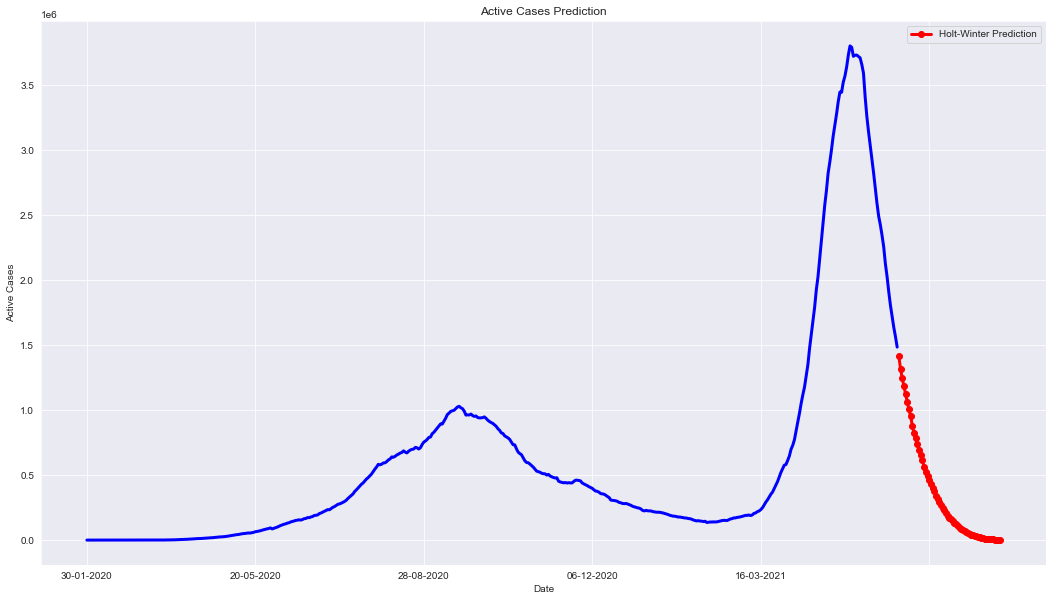

Forecasting Active Cases of Covid19 using Holt-Winters method with additive seasonality.


In [27]:
plt.figure(figsize=(18,10))
fit1 = ExponentialSmoothing(data4, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(color='blue',linewidth=3)

fcast1 = fit1.forecast(61).rename("Holt-Winter Prediction")
fcast1.plot( color='red',marker='o', legend=True,linewidth=3)

print('Number of Active Cases From 6th June to 31st July')
print(fit1.forecast(61))
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Prediction')
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
#plt.ylim(0,100)
plt.show()
print("Forecasting Active Cases of Covid19 using Holt-Winters method with additive seasonality.")

In [28]:
fcast1.iplot(xTitle='Date',yTitle='Active Cases')

# INFECTION RATE PREDICTION
### Infection rate of age group of (25-50)

In [35]:
data5 = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','infection_rate'])
data5 = data5[(data5 != 0).all(1)]

In [36]:
data5.head()

,infection_rate
Date,
30-03-2020,0.0001
31-03-2020,0.0001
01-04-2020,0.0001
02-04-2020,0.0001
03-04-2020,0.0002


In [37]:
data5.tail()

,infection_rate
Date,
01-06-2021,2.4968
02-06-2021,3.0820
03-06-2021,2.6617
04-06-2021,1.4277
05-06-2021,1.1893


In [38]:
data5.iplot(xTitle='Date',yTitle='Infection Rate in 35-50 Age Group')

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

C:\Users\conne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index b

Infection rate of people in age group 35-50
433    1.234706
434    1.228336
435    1.270851
436    1.296459
437    1.382247
         ...   
489    1.797409
490    1.829338
491    1.784987
492    1.785458
493    1.703856
Length: 61, dtype: float64


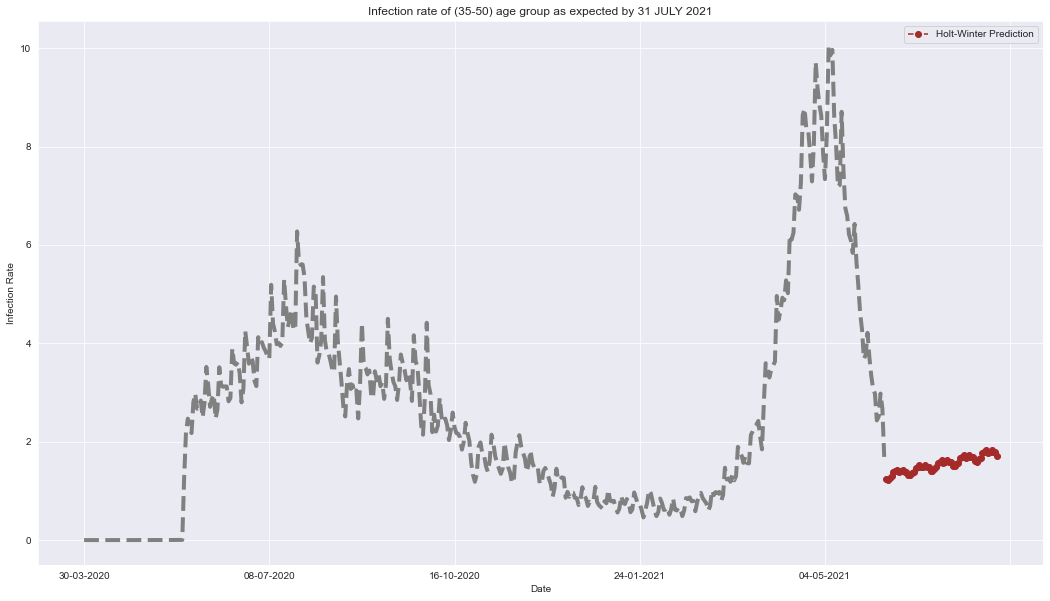

Forecasting Infection rate of people in 35-50 age group due to Covid19 using Holt-Winters method with additive seasonality.


In [39]:
plt.figure(figsize=(18,10))
fit1 = ExponentialSmoothing(data5, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='grey',linewidth=4)

fcast1 = fit1.forecast(61).rename("Holt-Winter Prediction")
fcast1.plot(style='--', marker='o', color='brown', legend=True)

print('Infection rate of people in age group 35-50')
print(fit1.forecast(61))
plt.xlabel('Date')
plt.ylabel('Infection Rate')
plt.title('Infection rate of (35-50) age group as expected by 31 JULY 2021')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("Forecasting Infection rate of people in 35-50 age group due to Covid19 using Holt-Winters method with additive seasonality.")

In [40]:
fcast1.iplot(xTitle='Date',yTitle='Infection Rate in 35-50 age group')